In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# CLUSTER PASSENGERS

#### Exploracion de datos, calidad de datos, construcción y definición del cluster

### Importando los datos

In [2]:
# MESES CON 31 DÍAS

# Desde el 1 de enero al 17 de enero, sigue una estructura.
# Desde mitad del 17 hasta fin de año sigue otra estructura.
# Por lo tanto he excluido el fichero 17/01 en primera instancia, y he leido de manera distinta las dos estructuras

# Añadimos los campos EXTRA 1 y EXTRA 2 para capturar posibles desplazamientos de los campos por fila

frames = []

for i in range(1,17):
    day  = str(i)
    if (i<10):
        day = '0' + str(i)
    file_name = 'D:\\Usuarios\\mdbrenes\\Documents\\Projects\\airport\\Documentos TT\\Datos de entrada\\ABPC\\abpc_2018-01-' + day + '.csv'
    abpc_ = pd.read_csv(file_name, delimiter=';', names=['ID','FLIGHTID','LECTOR ID','CHECK DATE','STATUS','REASON','CHECKIN SEQUENCE NUMBER','PNR','DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE','DEPARTURE FLIGHT AIRLINE IATA CODE','DEPARTURE FLIGHT NUMBER','DEPARTURE FLIGHT SOBT','EXTRA 1','EXTRA 2'])
    frames.append(abpc_)

for j in [1,3,5,10,12]:
    date_1 = 18 if (j==1) else 1
    for i in range(date_1,32):
        day  = str(i)
        month = str(j)
        if (i<10):
            day = '0' + str(i)
        if (j<10):
            month = '0' + str(j)
        file_name = 'D:\\Usuarios\\mdbrenes\\Documents\\Projects\\airport\\Documentos TT\\Datos de entrada\\ABPC\\abpc_2018-' + month + '-' + day + '.csv'
        abpc_ = pd.read_csv(file_name, delimiter=';', names=['UPDATE','ID','FLIGHTID','LECTOR ID','CHECK DATE','STATUS','REASON','CHECKIN SEQUENCE NUMBER','PNR','DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE','DEPARTURE FLIGHT AIRLINE IATA CODE','DEPARTURE FLIGHT NUMBER','DEPARTURE FLIGHT SOBT','EXTRA 1','EXTRA 2'])
        abpc_2 = abpc_.drop([0],axis=0)
        frames.append(abpc_2)

In [3]:
# Meses con 30 dias

for j in [4,11]:
    for i in range(1,31):
        day  = str(i)
        month = str(j)
        if (i<10):
            day = '0' + str(i)
        if (j<10):
            month = '0' + str(j)
        file_name = 'D:\\Usuarios\\mdbrenes\\Documents\\Projects\\airport\\Documentos TT\\Datos de entrada\\ABPC\\abpc_2018-' + month + '-' + day + '.csv'
        abpc_ = pd.read_csv(file_name, delimiter=';', names=['UPDATE','ID','FLIGHTID','LECTOR ID','CHECK DATE','STATUS','REASON','CHECKIN SEQUENCE NUMBER','PNR','DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE','DEPARTURE FLIGHT AIRLINE IATA CODE','DEPARTURE FLIGHT NUMBER','DEPARTURE FLIGHT SOBT','EXTRA 1','EXTRA 2'])
        abpc_2 = abpc_.drop([0],axis=0)
        frames.append(abpc_2)
        

In [4]:
# Febrero 28 dias

for i in range(1,29):
    day  = str(i)
    if (i<10):
        day = '0' + str(i)
    file_name = 'D:\\Usuarios\\mdbrenes\\Documents\\Projects\\airport\\Documentos TT\\Datos de entrada\\ABPC\\abpc_2018-02-' + day + '.csv'
    abpc_ = pd.read_csv(file_name, delimiter=';', names=['UPDATE','ID','FLIGHTID','LECTOR ID','CHECK DATE','STATUS','REASON','CHECKIN SEQUENCE NUMBER','PNR','DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE','DEPARTURE FLIGHT AIRLINE IATA CODE','DEPARTURE FLIGHT NUMBER','DEPARTURE FLIGHT SOBT','EXTRA 1','EXTRA 2'])
    abpc_2 = abpc_.drop([0],axis=0)
    frames.append(abpc_2)

In [5]:
# Concatenamos todos los meses

abpc = pd.concat(frames)

# Ordenamos los campos

cols = ['ID','FLIGHTID','LECTOR ID','CHECK DATE','STATUS','REASON','CHECKIN SEQUENCE NUMBER','PNR','DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE','DEPARTURE FLIGHT AIRLINE IATA CODE','DEPARTURE FLIGHT NUMBER','DEPARTURE FLIGHT SOBT','UPDATE','EXTRA 1','EXTRA 2']

abpc = abpc[cols]

abpc.reset_index(inplace=True,drop=True)

D:\Programas\Anaconda\envs\predictive.analytics\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [6]:
abpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6248907 entries, 0 to 6248906
Data columns (total 15 columns):
ID                                                object
FLIGHTID                                          object
LECTOR ID                                         object
CHECK DATE                                        object
STATUS                                            object
REASON                                            object
CHECKIN SEQUENCE NUMBER                           object
PNR                                               object
DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE    object
DEPARTURE FLIGHT AIRLINE IATA CODE                object
DEPARTURE FLIGHT NUMBER                           object
DEPARTURE FLIGHT SOBT                             object
UPDATE                                            object
EXTRA 1                                           object
EXTRA 2                                           object
dtypes: object(15)
memory usage:

In [7]:
abpc.head()

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2
0,9223629,9211112,aia-abpc-abg014,01/01/2018 00:12,PASSED,NaN,0082,VADYGL,0082,A3,610,01/01/2018 06:35,NaN,NaN,NaN
1,9223630,9211112,aia-abpc-abg015,01/01/2018 00:12,PASSED,NaN,0061,VADYGL,0061,A3,610,01/01/2018 06:35,NaN,NaN,NaN
2,9223631,9203297,aia-abpc-wks006,01/01/2018 00:49,PASSED,NaN,0041,MFTBYC,0041,A3,926,01/01/2018 05:30,NaN,NaN,NaN
3,9223632,9203297,aia-abpc-wks006,01/01/2018 00:49,PASSED,NaN,0040,MFTBYC,0040,A3,926,01/01/2018 05:30,NaN,NaN,NaN
4,9223633,9203275,aia-abpc-abg002,01/01/2018 01:23,PASSED,NaN,0041,DAJYGW,0041,AZ,717,01/01/2018 03:55,NaN,NaN,NaN


#### Estudiamos el campo STATUS, que define si el pasajero ha pasado o no el control de seguridad

In [8]:
abpc['STATUS'].unique()

array(['PASSED', 'UNKNOWN', 'ERROR', 'NOTPASSED', 'REJECTED', 'DENIED',
       'EXIT'], dtype=object)

In [9]:
for reason in abpc['STATUS'].unique():
    num = abpc['ID'].loc[abpc['STATUS']==reason].count()
    print('Num passengers, STATUS:',reason)
    print(num)

Num passengers, STATUS: PASSED
6103464
Num passengers, STATUS: UNKNOWN
122384
Num passengers, STATUS: ERROR
3521
Num passengers, STATUS: NOTPASSED
2314
Num passengers, STATUS: REJECTED
2568
Num passengers, STATUS: DENIED
12152
Num passengers, STATUS: EXIT
2504


In [10]:
abpc = abpc.loc[abpc['STATUS']=='PASSED'] # Filtramos por los que han pasado

In [11]:
abpc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6103464 entries, 0 to 6248906
Data columns (total 15 columns):
ID                                                object
FLIGHTID                                          object
LECTOR ID                                         object
CHECK DATE                                        object
STATUS                                            object
REASON                                            object
CHECKIN SEQUENCE NUMBER                           object
PNR                                               object
DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE    object
DEPARTURE FLIGHT AIRLINE IATA CODE                object
DEPARTURE FLIGHT NUMBER                           object
DEPARTURE FLIGHT SOBT                             object
UPDATE                                            object
EXTRA 1                                           object
EXTRA 2                                           object
dtypes: object(15)
memory usage:

#### Corregimos las filas con campos extra (error externo)

In [12]:
# Puede haber alguna fila que tenga un campo de más por error

abpc.loc[pd.isnull(abpc['EXTRA 1'])!=True]

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2
43616,9275004,9246126,aia-abpc-wks002,03/01/2018 12:11,PASSED,InvalidFlightStateAccept,PaxAlreadyPassedAccept,0020,NBPSVD,0020,HV,6868,NaN,03/01/2018 09:50,NaN
45240,9276913,9117574,aia-abpc-wks006,03/01/2018 14:04,PASSED,InvalidDateAccept,InvalidFlightStateAccept,0068,MMDYF3,0068,A3,0858,NaN,27/12/2017 15:30,NaN
118534,9363517,9.33724e+06,aia-abpc-wks003,07/01/2018 12:38,PASSED,InvalidFlightStateAccept,PaxAlreadyPassedAccept,0173,V4QKLZ,0173,LX,1831,NaN,07/01/2018 12:05,NaN
121137,9366608,9.34534e+06,aia-abpc-abg006,07/01/2018 15:10,PASSED,NaN,0109,PXZ85S,0109,OA,0122,07/01/2018 169370834,NaN,9349089,aia-abpc-abg015
171091,9440859,9.42128e+06,aia-abpc-wks002,11/01/2018 12:06,PASSED,InvalidFlightStateAccept,PaxAlreadyPassedAccept,0053,PZ9ZU8,0053,OA,0114,NaN,11/01/2018 11:30,NaN
174336,9444856,9.42128e+06,aia-abpc-wks002,11/01/2018 16:44,PASSED,InvalidFlightStateAccept,PaxAlreadyPassedAccept,0053,PZ9ZU8,0053,OA,0114,NaN,11/01/2018 11:30,NaN
220543,9499716,NaN,aia-abpc-wks007,14/01/2018 13:46,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,UnknownFlightAccept,00000,UWE4B2,0,A3,NaN,614,10/03/2018 22:00
246148,9530180,NaN,aia-abpc-wks003,16/01/2018 06:11,PASSED,UnknownFlightAccept,PaxAlreadyPassedAccept,0013,P7TDJX,0013,OA,0122,NaN,15/01/2018 22:00,NaN
246473,9530576,NaN,aia-abpc-wks002,16/01/2018 06:25,PASSED,UnknownFlightAccept,PaxAlreadyPassedAccept,0015,OPNENN,0015,OA,0122,NaN,15/01/2018 22:00,NaN
246978,9531184,NaN,aia-abpc-wks003,16/01/2018 06:53,PASSED,UnknownFlightAccept,PaxAlreadyPassedAccept,0013,P7TDJX,0013,OA,0122,NaN,15/01/2018 22:00,NaN


In [13]:
# Puede haber alguna fila que tenga un campo de más por error

abpc.loc[pd.isnull(abpc['EXTRA 2'])!=True]

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2
121137,9366608,9.34534e+06,aia-abpc-abg006,07/01/2018 15:10,PASSED,NaN,0109,PXZ85S,0109,OA,0122,07/01/2018 169370834,NaN,9349089,aia-abpc-abg015
220543,9499716,NaN,aia-abpc-wks007,14/01/2018 13:46,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,UnknownFlightAccept,00000,UWE4B2,0,A3,NaN,614,10/03/2018 22:00
319983,9631822,9490881,aia-abpc-wks007,22/01/2018 05:18,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,InvalidFlightStateAccept,0040,RVS7S5,AMS,A3,22/01/2018 05:21,616,15/01/2018 06:45
1385116,12287188,12035656,aia-abpc-wks007,14/05/2018 15:37,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,InvalidFlightStateAccept,0030,VTPSBO,MUC,LH,14/05/2018 15:38,1753,07/05/2018 16:20
3763583,22218141,21999309,aia-abpc-wks007,22/12/2018 12:45,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,InvalidFlightStateAccept,0043,T25F8R,HER,OA,22/12/2018 12:50,0322,17/12/2018 14:10
4588428,11682167,11542382,aia-abpc-wks007,24/04/2018 04:54,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,InvalidFlightStateAccept,0056,WRXCJU,SKG,OA,24/04/2018 04:55,0108,20/04/2018 05:45
4607279,11704434,NaN,aia-abpc-wks007,25/04/2018 03:53,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,UnknownFlightAccept,0102,ZV2CRJ,CHQ,FR,25/04/2018 03:54,2220,25/04/2018 21:00
4612637,11710445,11121655,aia-abpc-wks007,25/04/2018 07:06,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,InvalidFlightStateAccept,0020,M7Z7QO,JMK,OA,25/04/2018 07:07,380,04/04/2018 16:05


In [14]:
abpc.loc[(pd.isnull(abpc['EXTRA 1'])!=True)&(pd.isnull(abpc['EXTRA 2'])!=True)]

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2
121137,9366608,9.34534e+06,aia-abpc-abg006,07/01/2018 15:10,PASSED,NaN,0109,PXZ85S,0109,OA,0122,07/01/2018 169370834,NaN,9349089,aia-abpc-abg015
220543,9499716,NaN,aia-abpc-wks007,14/01/2018 13:46,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,UnknownFlightAccept,00000,UWE4B2,0,A3,NaN,614,10/03/2018 22:00
319983,9631822,9490881,aia-abpc-wks007,22/01/2018 05:18,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,InvalidFlightStateAccept,0040,RVS7S5,AMS,A3,22/01/2018 05:21,616,15/01/2018 06:45
1385116,12287188,12035656,aia-abpc-wks007,14/05/2018 15:37,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,InvalidFlightStateAccept,0030,VTPSBO,MUC,LH,14/05/2018 15:38,1753,07/05/2018 16:20
3763583,22218141,21999309,aia-abpc-wks007,22/12/2018 12:45,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,InvalidFlightStateAccept,0043,T25F8R,HER,OA,22/12/2018 12:50,0322,17/12/2018 14:10
4588428,11682167,11542382,aia-abpc-wks007,24/04/2018 04:54,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,InvalidFlightStateAccept,0056,WRXCJU,SKG,OA,24/04/2018 04:55,0108,20/04/2018 05:45
4607279,11704434,NaN,aia-abpc-wks007,25/04/2018 03:53,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,UnknownFlightAccept,0102,ZV2CRJ,CHQ,FR,25/04/2018 03:54,2220,25/04/2018 21:00
4612637,11710445,11121655,aia-abpc-wks007,25/04/2018 07:06,PASSED,FastTrackIndicatorRequiredAccept,InvalidDateAccept,InvalidFlightStateAccept,0020,M7Z7QO,JMK,OA,25/04/2018 07:07,380,04/04/2018 16:05


In [15]:
# Eliminamos las filas intratables (muchos campos erroneos y no comprensibles)

for index in abpc.loc[(pd.isnull(abpc['EXTRA 1'])!=True)&(pd.isnull(abpc['EXTRA 2'])!=True)].index.values:
    abpc = abpc.drop([index],axis=0)
    
abpc.reset_index(inplace=True,drop=True)

In [16]:
# Reconstruimos las filas que tienen solo un campo extra (una razon de mas)
# NOTA: Tarda mucho en ejecutarse (reconstruye fila por fila)

for index in abpc.loc[pd.isnull(abpc['EXTRA 1'])!=True].index.values:
    reason_1 = abpc['REASON'].iloc[index]
    reason_2 = abpc['CHECKIN SEQUENCE NUMBER'].iloc[index]
    if ((reason_1 != None)&(reason_2 != None)):
        reason = [reason_1 + '_&_' + reason_2]
        new_row = list(abpc.iloc[index,0:5].values) + reason + list(abpc.iloc[index,7:12].values) + [abpc.iloc[index,13]] + [abpc.iloc[index,12]] + [None,None]
        abpc.iloc[index,:] = new_row

abpc.reset_index(inplace=True,drop=True)

In [17]:
# Comprobamos si aun queda algun Campo Extra sin corregir

abpc['ID'].loc[pd.isnull(abpc['EXTRA 1'])!=True].sum()

abpc['ID'].loc[pd.isnull(abpc['EXTRA 2'])!=True].sum()

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2


,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2


#### Estudiamos el campo REASON

In [19]:
abpc['REASON'].unique()

array([nan, 'FastTrackIndicatorRequiredAccept', 'PaxAlreadyPassedAccept',
       'InvalidFlightStateAccept', 'InvalidDateAccept',
       'PaxAlreadyPassedAutoAccept',
       'InvalidFlightStateAccept_&_PaxAlreadyPassedAccept',
       'InvalidDateAccept_&_InvalidFlightStateAccept',
       'UnknownFlightAccept',
       'UnknownFlightAccept_&_PaxAlreadyPassedAccept',
       'InvalidDateAccept_&_UnknownFlightAccept',
       'FastTrackIndicatorRequiredAccept_&_UnknownFlightAccept',
       'FastTrackIndicatorRequiredAccept_&_InvalidFlightStateAccept',
       'InvalidDateAccept_&_PaxAlreadyPassedAccept',
       'UnknownFlightAccept_&_PaxAlreadyPassedAutoAccept',
       'PaxAlreadyPassedAccept_&_PaxAlreadyPassedAutoAccept',
       'FastTrackIndicatorRequiredAccept_&_PaxAlreadyPassedAutoAccept',
       'FastTrackIndicatorRequiredAccept_&_InvalidDateAccept'],
      dtype=object)

In [20]:
for reason in abpc['REASON'].unique():
    num = abpc['ID'].loc[abpc['REASON']==reason].count()
    print('Num passengers, REASON:',reason)
    print(num)

Num passengers, REASON: nan
0
Num passengers, REASON: FastTrackIndicatorRequiredAccept
92000
Num passengers, REASON: PaxAlreadyPassedAccept
25118
Num passengers, REASON: InvalidFlightStateAccept
292
Num passengers, REASON: InvalidDateAccept
552
Num passengers, REASON: PaxAlreadyPassedAutoAccept
146
Num passengers, REASON: InvalidFlightStateAccept_&_PaxAlreadyPassedAccept
107
Num passengers, REASON: InvalidDateAccept_&_InvalidFlightStateAccept
41
Num passengers, REASON: UnknownFlightAccept
865
Num passengers, REASON: UnknownFlightAccept_&_PaxAlreadyPassedAccept
15
Num passengers, REASON: InvalidDateAccept_&_UnknownFlightAccept
80
Num passengers, REASON: FastTrackIndicatorRequiredAccept_&_UnknownFlightAccept
12
Num passengers, REASON: FastTrackIndicatorRequiredAccept_&_InvalidFlightStateAccept
2
Num passengers, REASON: InvalidDateAccept_&_PaxAlreadyPassedAccept
2
Num passengers, REASON: UnknownFlightAccept_&_PaxAlreadyPassedAutoAccept
3
Num passengers, REASON: PaxAlreadyPassedAccept_&_Pa

### Añadimos el campo LOCAL (Vuelo internacional o local)

In [21]:
file_name = 'D:\\Usuarios\\mdbrenes\\Documents\\Projects\\airport\\Documentos TT\\DIC_AIRP_Athenas.csv'
ap = pd.read_csv(file_name,delimiter=';',header=0)

In [22]:
ap_sheng = ap.loc[(ap['SWITCH_SCHENGEN']==1)]

ap_sheng_loc = ap_sheng.loc[ap_sheng['SWITCH_LOCAL']==1]
ap_sheng_int = ap_sheng.loc[ap_sheng['SWITCH_LOCAL']==0]

In [23]:
abpc['LOCAL'] = list(map(lambda x: x in ap_sheng_loc['CODE'].values,abpc['DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE']))
abpc['SCHENGEN'] = list(map(lambda x: x in ap_sheng['CODE'].values,abpc['DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE']))

### Preprocesamiento de datos

In [24]:
# Encode Categorycal Variables

# STATUS

labelencoder_X = LabelEncoder()
abpc['STATUS'] = labelencoder_X.fit_transform(abpc['STATUS'])

# 0 PASSED
# 1 NOT PASSED

In [25]:
abpc.head()

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2,LOCAL,SCHENGEN
0,9223629,9211112,aia-abpc-abg014,01/01/2018 00:12,0,NaN,0082,VADYGL,0082,A3,610,01/01/2018 06:35,NaN,NaN,NaN,False,False
1,9223630,9211112,aia-abpc-abg015,01/01/2018 00:12,0,NaN,0061,VADYGL,0061,A3,610,01/01/2018 06:35,NaN,NaN,NaN,False,False
2,9223631,9203297,aia-abpc-wks006,01/01/2018 00:49,0,NaN,0041,MFTBYC,0041,A3,926,01/01/2018 05:30,NaN,NaN,NaN,False,False
3,9223632,9203297,aia-abpc-wks006,01/01/2018 00:49,0,NaN,0040,MFTBYC,0040,A3,926,01/01/2018 05:30,NaN,NaN,NaN,False,False
4,9223633,9203275,aia-abpc-abg002,01/01/2018 01:23,0,NaN,0041,DAJYGW,0041,AZ,717,01/01/2018 03:55,NaN,NaN,NaN,False,False


In [26]:
# Hay algun nulo en las fechas?

nulls_sobt = abpc['DEPARTURE FLIGHT SOBT'].isnull().sum()

nulls_check = abpc['CHECK DATE'].isnull().sum()


In [27]:
abpc.reset_index(inplace=True,drop=True)

to_drop_ds = []
if (nulls_sobt!=0):
    for ind in range(0,len(abpc['DEPARTURE FLIGHT SOBT'].values)):
        date = abpc['DEPARTURE FLIGHT SOBT'].iloc[ind]
        if (pd.isnull(date)):
            print('DEPARTURE FLIGHT SOBT:',date,'---')
            to_drop_ds.append(ind)
        
to_drop_cd = []
if (nulls_check!=0):
    for ind in range(0,len(abpc['CHECK DATE'].values)):
        date = abpc['CHECK DATE'].iloc[ind]
        if (pd.isnull(date)):
            print('CHECK DATE:',date,'---')
            to_drop_cd.append(ind)
        
to_drop = list(set(to_drop_ds) | set(to_drop_cd))

In [28]:
to_drop_ds

[]

In [29]:
to_drop_cd

[]

In [30]:
to_drop

[]

In [31]:
abpc.drop(to_drop,inplace=True) # Solo una vez!!

abpc.reset_index(inplace=True,drop=True)

In [32]:
# Dates to Datetime

abpc.reset_index(inplace=True,drop=True)

# Check-Date

date_check = pd.to_datetime(abpc['CHECK DATE'],format = '%d/%m/%Y %H:%M')

# Departure Date

date_dep = pd.to_datetime(abpc['DEPARTURE FLIGHT SOBT'],format = '%d/%m/%Y %H:%M')

# Vemos si hay alguna fecha que no se haya convertido bien o es nula

nulls_check_ = date_check.isnull().sum()

nulls_sobt_ = date_dep.isnull().sum()

if (nulls_check_!=0):
    for ind in range(0,len(date_check)):
        if (pd.isnull(date_check[ind])):
            print(ind)
            print('CHECK DATE:',date_check[ind],'---')

if (nulls_sobt_!=0):
    for ind in range(0,len(date_dep)):
        if (pd.isnull(date_dep[ind])):
            print(ind)
            print('DEPARTURE FLIGHT SOBT:',date_dep[ind],'---')


In [33]:
# Dates to String Format %Y-%m-%d %H:%M:%S

abpc['CHECK DATE']=date_check.map(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

abpc['DEPARTURE FLIGHT SOBT']=date_dep.map(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [34]:
abpc.head()

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,DEPARTURE FLIGHT NUMBER,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2,LOCAL,SCHENGEN
0,9223629,9211112,aia-abpc-abg014,2018-01-01 00:12:00,0,NaN,0082,VADYGL,0082,A3,610,2018-01-01 06:35:00,NaN,NaN,NaN,False,False
1,9223630,9211112,aia-abpc-abg015,2018-01-01 00:12:00,0,NaN,0061,VADYGL,0061,A3,610,2018-01-01 06:35:00,NaN,NaN,NaN,False,False
2,9223631,9203297,aia-abpc-wks006,2018-01-01 00:49:00,0,NaN,0041,MFTBYC,0041,A3,926,2018-01-01 05:30:00,NaN,NaN,NaN,False,False
3,9223632,9203297,aia-abpc-wks006,2018-01-01 00:49:00,0,NaN,0040,MFTBYC,0040,A3,926,2018-01-01 05:30:00,NaN,NaN,NaN,False,False
4,9223633,9203275,aia-abpc-abg002,2018-01-01 01:23:00,0,NaN,0041,DAJYGW,0041,AZ,717,2018-01-01 03:55:00,NaN,NaN,NaN,False,False


In [36]:
# Adding a variable: Dwell Time (Check - Departure)

# Dwell Time
dwell_time = date_dep - date_check
abpc['DWELL TIME'] = dwell_time.map(lambda x: x.total_seconds()/3600)

In [37]:
# Adding a variable: DEPARTURE SOBT HOUR , DEPARTURE SOBT WEEKDAY

abpc['DEPARTURE SOBT HOUR'] = date_dep.map(lambda x: x.hour)
abpc['DEPARTURE SOBT WEEKDAY'] = date_dep.map(lambda x: x.weekday())


In [38]:
abpc.head()

,ID,FLIGHTID,LECTOR ID,CHECK DATE,STATUS,REASON,CHECKIN SEQUENCE NUMBER,PNR,DEPARTURE FLIGHT DESTINATION AIRPORT IATA CODE,DEPARTURE FLIGHT AIRLINE IATA CODE,...,DEPARTURE FLIGHT SOBT,UPDATE,EXTRA 1,EXTRA 2,LOCAL,SCHENGEN,DWELL TIME,DEPARTURE SOBT HOUR,DEPARTURE SOBT CLUSTER,DEPARTURE SOBT WEEKDAY
0,9223629,9211112,aia-abpc-abg014,2018-01-01 00:12:00,0,NaN,0082,VADYGL,0082,A3,...,2018-01-01 06:35:00,NaN,NaN,NaN,False,False,6.383333,6,NM,0
1,9223630,9211112,aia-abpc-abg015,2018-01-01 00:12:00,0,NaN,0061,VADYGL,0061,A3,...,2018-01-01 06:35:00,NaN,NaN,NaN,False,False,6.383333,6,NM,0
2,9223631,9203297,aia-abpc-wks006,2018-01-01 00:49:00,0,NaN,0041,MFTBYC,0041,A3,...,2018-01-01 05:30:00,NaN,NaN,NaN,False,False,4.683333,5,NM,0
3,9223632,9203297,aia-abpc-wks006,2018-01-01 00:49:00,0,NaN,0040,MFTBYC,0040,A3,...,2018-01-01 05:30:00,NaN,NaN,NaN,False,False,4.683333,5,NM,0
4,9223633,9203275,aia-abpc-abg002,2018-01-01 01:23:00,0,NaN,0041,DAJYGW,0041,AZ,...,2018-01-01 03:55:00,NaN,NaN,NaN,False,False,2.533333,3,NM,0


In [39]:
# DEPARTURE SOBT CLUSTER

uno = [13,14,15,16,17,18,19] # Good Cluster
tres = [10,11,12] # Good cluster
dos = [2,4,5,6,7] # Good Cluster 
# Faltan las horas sueltas: 20,21,22,23,0,1,3 (un cluster por cada una)

def clust_day_zone(x):
    if (x in uno):
        return 'A'
    elif (x in tres):
        return 'MD'
    elif (x in dos):
        return 'NM'
    else:
        return str(x)

abpc['DEPARTURE SOBT CLUSTER'] = abpc['DEPARTURE SOBT HOUR'].map(lambda x: clust_day_zone(x))

In [41]:
abpc['DWELL HOUR'] = abpc['DWELL TIME'].map(lambda x: int(x))

abpc['DWELL MIN'] = abpc['DWELL TIME'].map(lambda x: (x-int(x))*60)

#### Dataframe 

In [99]:
cleaned_df = abpc[['DWELL TIME','DEPARTURE SOBT CLUSTER','DEPARTURE SOBT HOUR','DEPARTURE SOBT WEEKDAY','LOCAL']]

In [101]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103456 entries, 0 to 6103455
Data columns (total 5 columns):
DWELL TIME                float64
DEPARTURE SOBT CLUSTER    object
DEPARTURE SOBT HOUR       int64
DEPARTURE SOBT WEEKDAY    int64
LOCAL                     bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 192.1+ MB


### Curva Patron Dwell Time

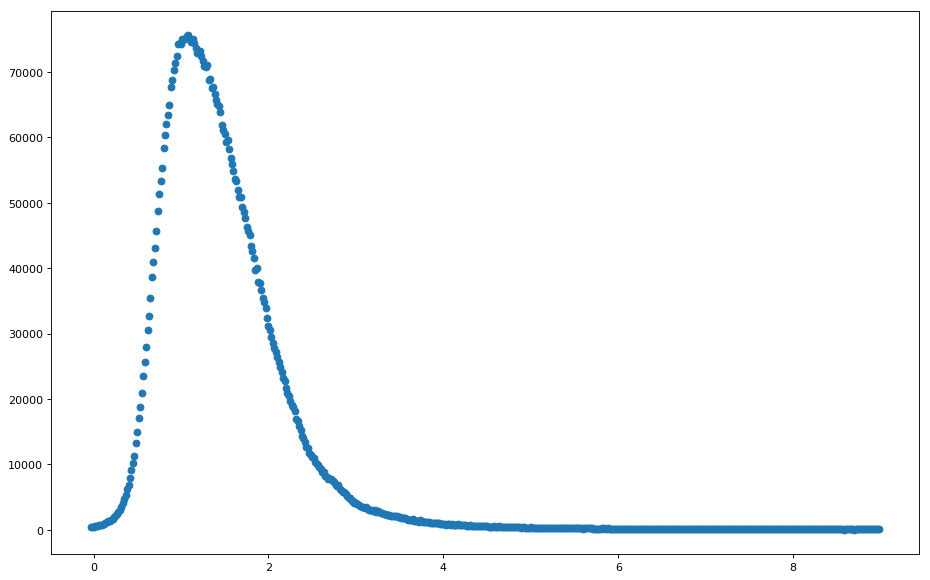

In [102]:
abpc.reset_index(inplace=True,drop='True')

dwtime = []
counts = []
#abpc_filt = abpc.loc[abpc['REASON']!='InvalidFlightStateAccept'].loc[(abpc['DWELL TIME']>-0.05)&(abpc['DWELL TIME']<9)] # Cogemos los de razones nulas
abpc_filt = cleaned_df.loc[(cleaned_df['DWELL TIME']>-0.05)&(cleaned_df['DWELL TIME']<9)] 

for dwt in abpc_filt['DWELL TIME'].unique(): 
    num = list(abpc_filt['DWELL TIME']).count(dwt)
    dwtime.append(dwt)
    counts.append(num)
    
fig = plt.figure(num=4, figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(dwtime,counts)

#### Departure Flights in Morning ('M')

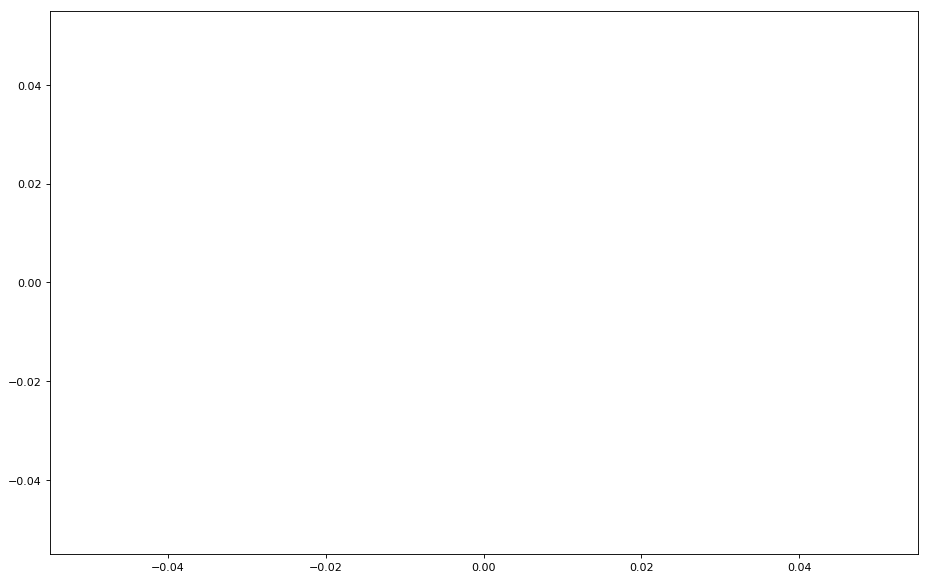

In [43]:
abpc.reset_index(inplace=True,drop='True')

dwtime = []
counts = []

abpc_filt = cleaned_df['DWELL TIME'].loc[cleaned_df['DEPARTURE SOBT CLUSTER']=='M'].loc[(cleaned_df['DWELL TIME']>-0.05)&(cleaned_df['DWELL TIME']<9)]
for dwt in abpc_filt.unique():
    num = list(abpc_filt).count(dwt)
    dwtime.append(dwt)
    counts.append(num)

fig = plt.figure(num=4, figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(dwtime,counts)

In [44]:
sum(counts)

0

#### Departure Flights in Afternoon ('A')

In [45]:
abpc.reset_index(inplace=True,drop='True')

dwtime = []
counts = []

abpc_filt = cleaned_df['DWELL TIME'].loc[cleaned_df['DEPARTURE SOBT CLUSTER']=='A'].loc[(cleaned_df['DWELL TIME']>-0.05)&(cleaned_df['DWELL TIME']<9)]
for dwt in abpc_filt.unique():
    num = list(abpc_filt).count(dwt)
    dwtime.append(dwt)
    counts.append(num)
    
plt.scatter(dwtime,counts)

KeyboardInterrupt: 

In [ ]:
sum(counts)

#### Departure Flights in Night ('N')

In [ ]:
abpc.reset_index(inplace=True,drop='True')

dwtime = []
counts = []

abpc_filt = cleaned_df['DWELL TIME'].loc[cleaned_df['DEPARTURE SOBT CLUSTER']=='N'].loc[(cleaned_df['DWELL TIME']>-0.05)&(cleaned_df['DWELL TIME']<9)]
for dwt in abpc_filt.unique():
    num = list(abpc_filt).count(dwt)
    dwtime.append(dwt)
    counts.append(num)
    
plt.scatter(dwtime,counts)

In [ ]:
sum(counts)

#### Departure Flights in Night-Morning ('NM')

In [ ]:
abpc.reset_index(inplace=True,drop='True')

dwtime = []
counts = []

abpc_filt = cleaned_df['DWELL TIME'].loc[cleaned_df['DEPARTURE SOBT CLUSTER']=='NM'].loc[(cleaned_df['DWELL TIME']>-0.05)&(cleaned_df['DWELL TIME']<9)]
for dwt in abpc_filt.unique():
    num = list(abpc_filt).count(dwt)
    dwtime.append(dwt)
    counts.append(num)
    
plt.scatter(dwtime,counts)

In [ ]:
sum(counts)

### Agregado por 15 minutos

<BarContainer object of 90 artists>

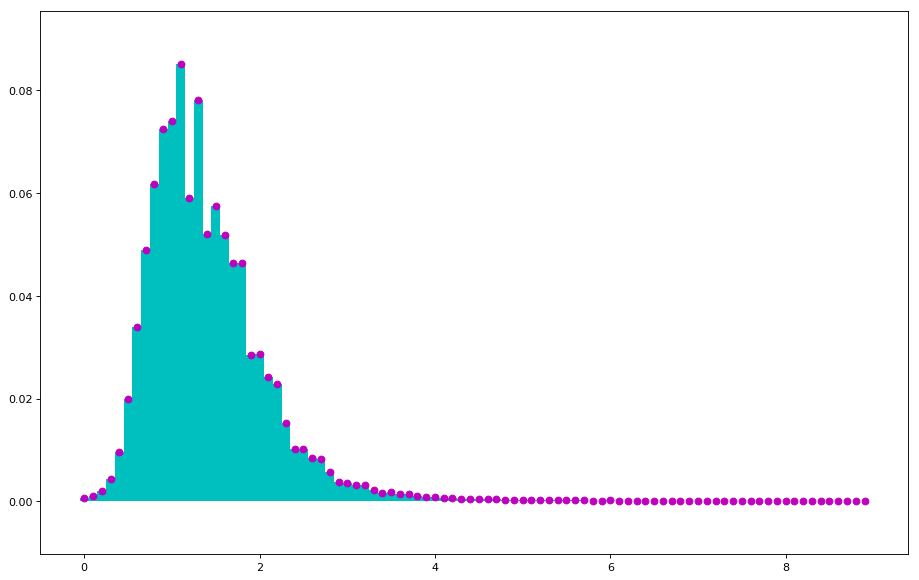

In [36]:
abpc.reset_index(inplace=True,drop='True')

def time_to_15m(t):
    mins = t-int(t)
    if ((mins>=0)&(mins<0.1)):
        return int(t)
    elif ((mins>=0.1)&(mins<0.2)):
        return int(t)+0.1
    elif ((mins>=0.2)&(mins<0.3)):
        return int(t)+0.2
    elif ((mins>=0.3)&(mins<0.4)):
        return int(t)+0.3
    elif ((mins>=0.4)&(mins<0.5)):
        return int(t)+0.4
    elif ((mins>=0.5)&(mins<0.6)):
        return int(t)+0.5
    elif ((mins>=0.6)&(mins<0.7)):
        return int(t)+0.6
    elif ((mins>=0.7)&(mins<0.8)):
        return int(t)+0.7
    elif ((mins>=0.8)&(mins<0.9)):
        return int(t)+0.8
    else:
        return int(t)+0.9
    
def time_to_5m(t):
    mins = t-int(t)
    result = int(t)
    for cota_inf in range(0,1,0.05):
        if ((mins>=cota_inf)&(mins<cota_inf+0.05)):
            result = int(t) + cota_inf
    return result

abpc['DWELL 15 MIN'] = abpc['DWELL TIME'].map(lambda x: time_to_15m(x))

dwtime = []
counts = []

abpc_filt = abpc['DWELL 15 MIN'].loc[(abpc['DWELL TIME']>-0.05)&(abpc['DWELL TIME']<9)]
for dwt in abpc_filt.unique():
    num = list(abpc_filt).count(dwt)
    dwtime.append(dwt)
    counts.append(num)
    
por = []
for i in range(0,len(counts)):
    por.append(counts[i]/sum(counts))
    
fig = plt.figure(num=4, figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(dwtime,por,color='m',zorder=5)
plt.bar(dwtime,por,color='c',zorder=0,width=0.1)

<BarContainer object of 90 artists>

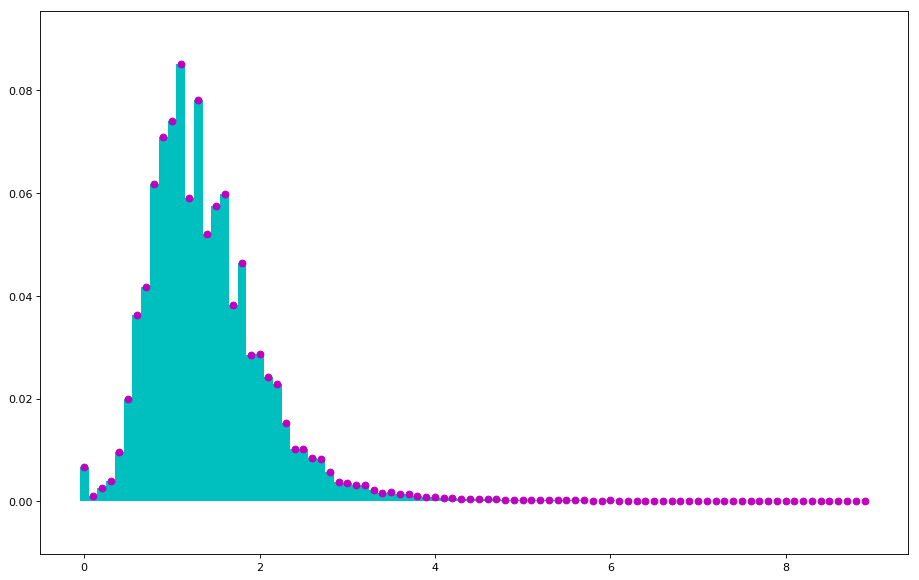

In [57]:
abpc.reset_index(inplace=True,drop='True')
    
def time_to_5m(t):
    mins = t-int(t)
    result = float(int(t))
    for cota_inf in np.arange(0.0, 1.0, 0.1):
        if ((mins>=cota_inf)&(mins<cota_inf+0.1)):
            result = int(t) + cota_inf
    return result

abpc['DWELL 5 MIN'] = abpc['DWELL TIME'].map(lambda x: time_to_5m(x))

dwtime = []
counts = []
for dwt in abpc['DWELL 5 MIN'].loc[(abpc['DWELL TIME']>-0.05)&(abpc['DWELL TIME']<9)].unique():
    num = list(abpc['DWELL 5 MIN']).count(dwt)
    dwtime.append(dwt)
    counts.append(num)
    
por = []
for i in range(0,len(counts)):
    por.append(counts[i]/sum(counts))
    
fig = plt.figure(num=4, figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(dwtime,por,color='m',zorder=5)
plt.bar(dwtime,por,color='c',zorder=0,width=0.1)

<BarContainer object of 242 artists>

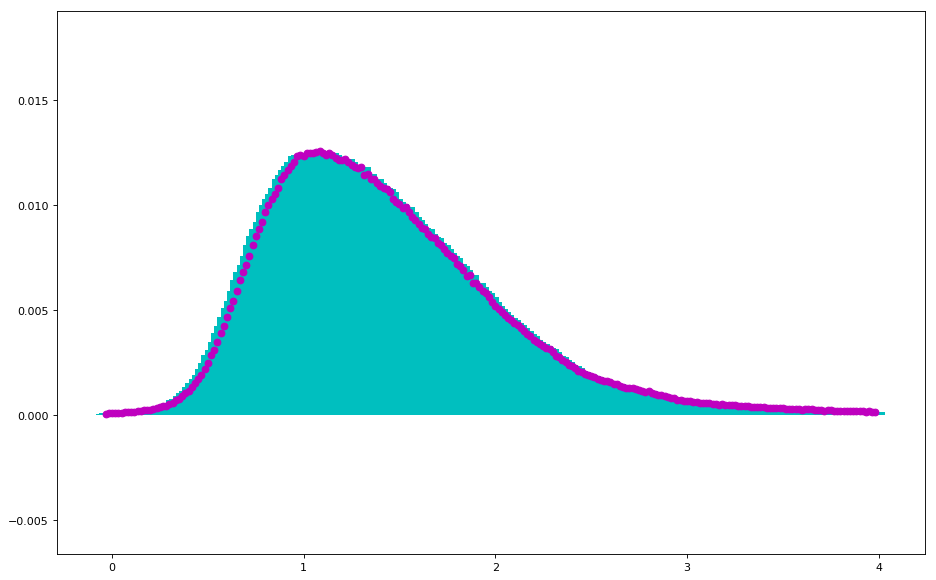

In [60]:
dwtime = []
counts = []
for dwt in abpc['DWELL TIME'].loc[abpc['REASON']!='InvalidFlightStateAccept'].loc[(abpc['DWELL TIME']>-0.05)&(abpc['DWELL TIME']<4)].unique(): # Cogemos los de razones nulas
    num = list(abpc['DWELL TIME']).count(dwt)
    dwtime.append(dwt)
    counts.append(num)
    
por = []
for i in range(0,len(counts)):
    por.append(counts[i]/sum(counts))
    
fig = plt.figure(num=4, figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(dwtime,por,color='m',zorder=5)
plt.bar(dwtime,por,color='c',zorder=0,width=0.1)

#### Departure Flights in Morning ('M')

In [ ]:
abpc.reset_index(inplace=True,drop='True')

dwtime = []
counts = []
for dwt in abpc['DWELL 15 MIN'].loc[abpc['REASON']!='InvalidFlightStateAccept'].loc[abpc['DEPARTURE SOBT CLUSTER']=='M'].loc[(abpc['DWELL TIME']>-0.05)&(abpc['DWELL TIME']<9)].unique(): # Cogemos los de razones nulas
    num = list(abpc['DWELL 15 MIN'].loc[abpc['REASON']!='InvalidFlightStateAccept'].loc[abpc['DEPARTURE SOBT CLUSTER']=='M']).count(dwt)
    dwtime.append(dwt)
    counts.append(num)

por = []
for i in range(0,len(counts)):
    por.append(counts[i]/sum(counts))
    
fig = plt.figure(num=4, figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(dwtime,por,color='m',zorder=5)
plt.bar(dwtime,por,color='c',zorder=0,width=0.1)

In [ ]:
sum(counts)

#### Departure Flights in Afternoon ('A')

In [ ]:
abpc.reset_index(inplace=True,drop='True')

dwtime = []
counts = []
for dwt in abpc['DWELL 15 MIN'].loc[abpc['REASON']!='InvalidFlightStateAccept'].loc[abpc['DEPARTURE SOBT CLUSTER']=='A'].loc[(abpc['DWELL TIME']>-0.05)&(abpc['DWELL TIME']<9)].unique(): # Cogemos los de razones nulas
    num = list(abpc['DWELL 15 MIN'].loc[abpc['REASON']!='InvalidFlightStateAccept'].loc[abpc['DEPARTURE SOBT CLUSTER']=='A']).count(dwt)
    dwtime.append(dwt)
    counts.append(num)
    
por = []
for i in range(0,len(counts)):
    por.append(counts[i]/sum(counts))
    
fig = plt.figure(num=4, figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(dwtime,por,color='m',zorder=5)
plt.bar(dwtime,por,color='c',zorder=0,width=0.1)

In [ ]:
sum(counts)

#### Departure Flights in Night ('N')

<BarContainer object of 89 artists>

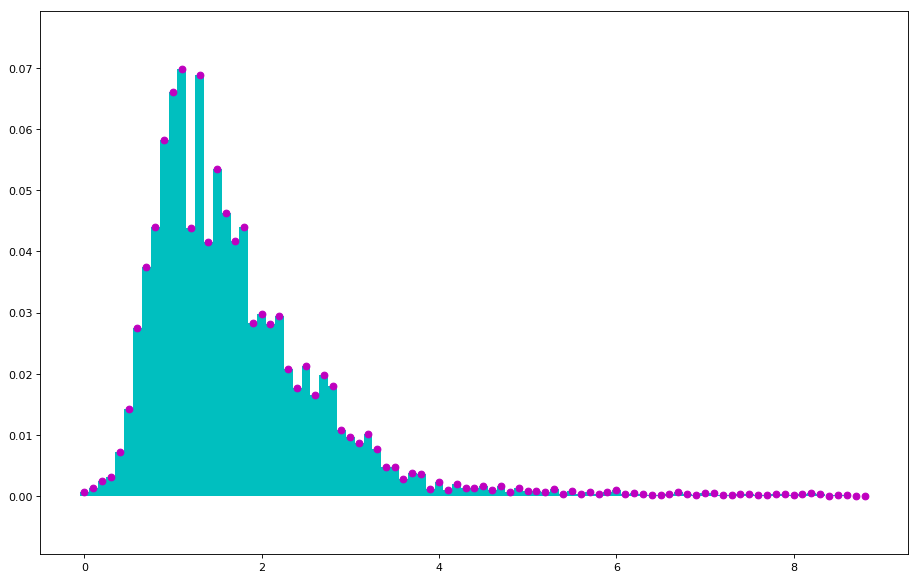

In [47]:
abpc.reset_index(inplace=True,drop='True')

dwtime = []
counts = []
for dwt in abpc['DWELL 15 MIN'].loc[abpc['REASON']!='InvalidFlightStateAccept'].loc[abpc['DEPARTURE SOBT CLUSTER']=='N'].loc[(abpc['DWELL TIME']>-0.05)&(abpc['DWELL TIME']<9)].unique(): # Cogemos los de razones nulas
    num = list(abpc['DWELL 15 MIN'].loc[abpc['REASON']!='InvalidFlightStateAccept'].loc[abpc['DEPARTURE SOBT CLUSTER']=='N']).count(dwt)
    dwtime.append(dwt)
    counts.append(num)
    
por = []
for i in range(0,len(counts)):
    por.append(counts[i]/sum(counts))
    
fig = plt.figure(num=4, figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(dwtime,por,color='m',zorder=5)
plt.bar(dwtime,por,color='c',zorder=0,width=0.1)

In [48]:
sum(counts)

13098

#### Departure Flights in Night-Morning ('NM')

<BarContainer object of 90 artists>

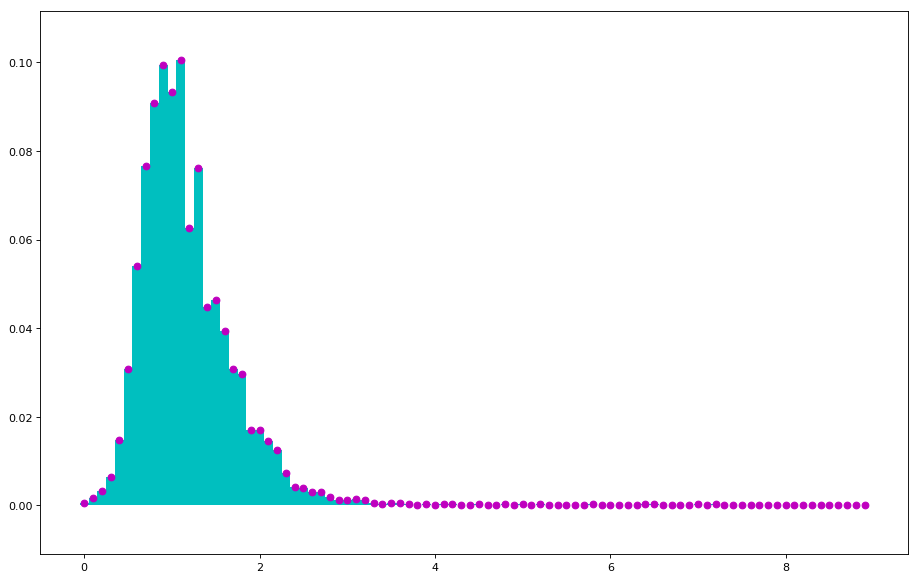

In [49]:
abpc.reset_index(inplace=True,drop='True')

dwtime = []
counts = []
for dwt in abpc['DWELL 15 MIN'].loc[abpc['REASON']!='InvalidFlightStateAccept'].loc[abpc['DEPARTURE SOBT CLUSTER']=='NM'].loc[(abpc['DWELL TIME']>-0.05)&(abpc['DWELL TIME']<9)].unique(): # Cogemos los de razones nulas
    num = list(abpc['DWELL 15 MIN'].loc[abpc['REASON']!='InvalidFlightStateAccept'].loc[abpc['DEPARTURE SOBT CLUSTER']=='NM']).count(dwt)
    dwtime.append(dwt)
    counts.append(num)
    
por = []
for i in range(0,len(counts)):
    por.append(counts[i]/sum(counts))
    
fig = plt.figure(num=4, figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(dwtime,por,color='m',zorder=5)
plt.bar(dwtime,por,color='c',zorder=0,width=0.1)

#### Cluster Por horas del Departure

In [78]:
abpc.reset_index(inplace=True,drop='True')

def times_and_counts(day_zone,local,wd):
    dwtime = []
    counts = []
    filtered = abpc['DWELL TIME'].loc[(abpc['DEPARTURE SOBT CLUSTER']==day_zone)&(abpc['LOCAL']==local)&(abpc['DEPARTURE SOBT WEEKDAY']==wd)].loc[(abpc['DWELL TIME']>-0.05)&(abpc['DWELL TIME']<4)]
    for dwt in filtered.unique():
        num = list(filtered).count(dwt)
        dwtime.append(dwt)
        counts.append(num)
        
    por = []
    for i in range(0,len(counts)):
        por.append(counts[i]/sum(counts))
    
    return dwtime,por

def compare_four_hours(day_zone1,day_zone2,day_zone3,day_zone4,local,wd):

    dwtime_1,por_1 = times_and_counts(day_zone1,local,wd)
    dwtime_2,por_2 = times_and_counts(day_zone2,local,wd)
    dwtime_3,por_3 = times_and_counts(day_zone3,local,wd)
    dwtime_4,por_4 = times_and_counts(day_zone4,local,wd)

    fig = plt.figure(num=4, figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')
    ax0 = fig.add_subplot(221)
    ax1 = fig.add_subplot(222)
    ax2 = fig.add_subplot(223)
    ax3 = fig.add_subplot(224)
    ax0.scatter(dwtime_1,por_1,color='m',zorder=5,s=0.8)
    ax0.bar(dwtime_1,por_1,color='c',zorder=0,width=0.04)
    ax1.scatter(dwtime_2,por_2,color='m',zorder=5,s=0.8)
    ax1.bar(dwtime_2,por_2,color='c',zorder=0,width=0.04)
    ax2.scatter(dwtime_3,por_3,color='m',zorder=5,s=0.8)
    ax2.bar(dwtime_3,por_3,color='c',zorder=0,width=0.04)
    ax3.scatter(dwtime_4,por_4,color='m',zorder=5,s=0.8)
    ax3.bar(dwtime_4,por_4,color='c',zorder=0,width=0.04)

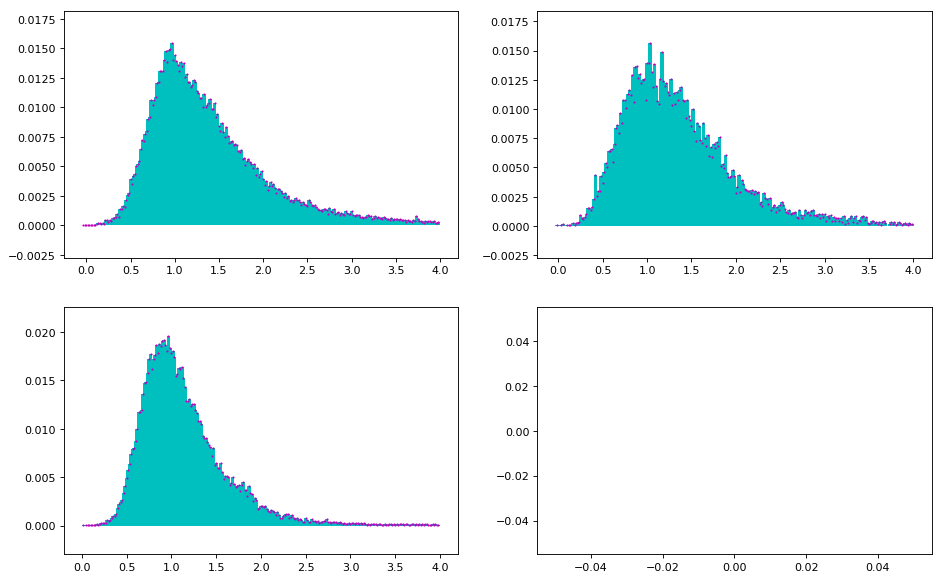

In [79]:
compare_four_hours('A','MD','NM','2',True,1)

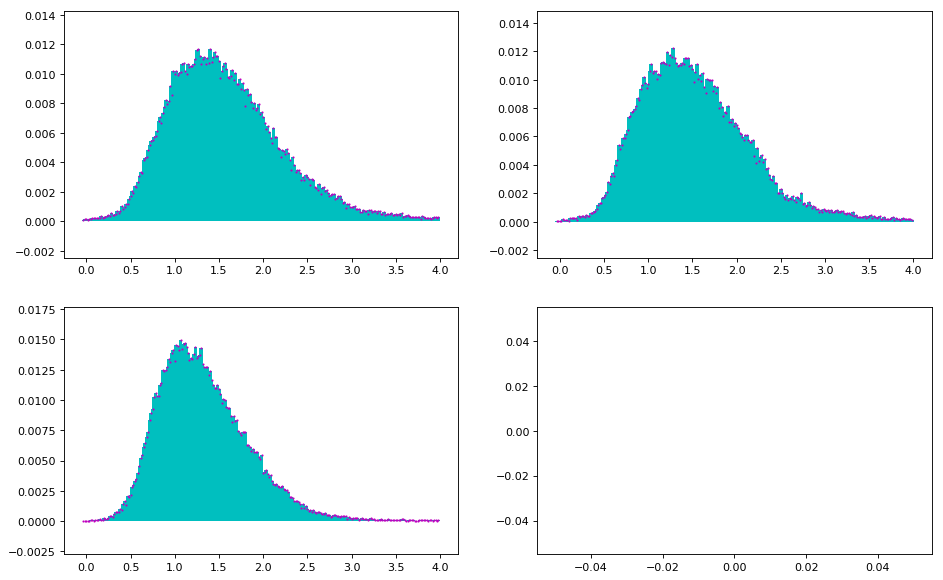

In [80]:
compare_four_hours('A','MD','NM','2',False,1)

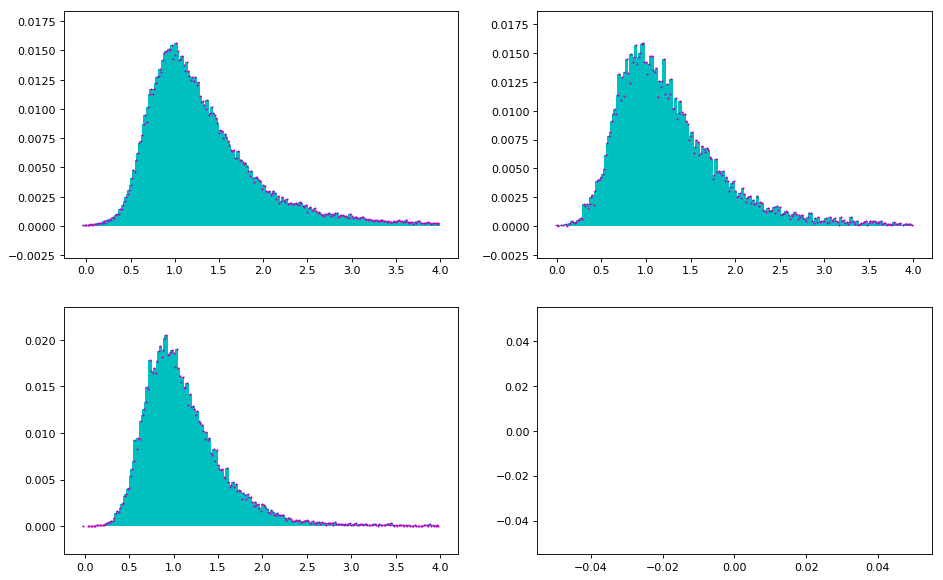

In [83]:
compare_four_hours('A','MD','NM','7',True,4)

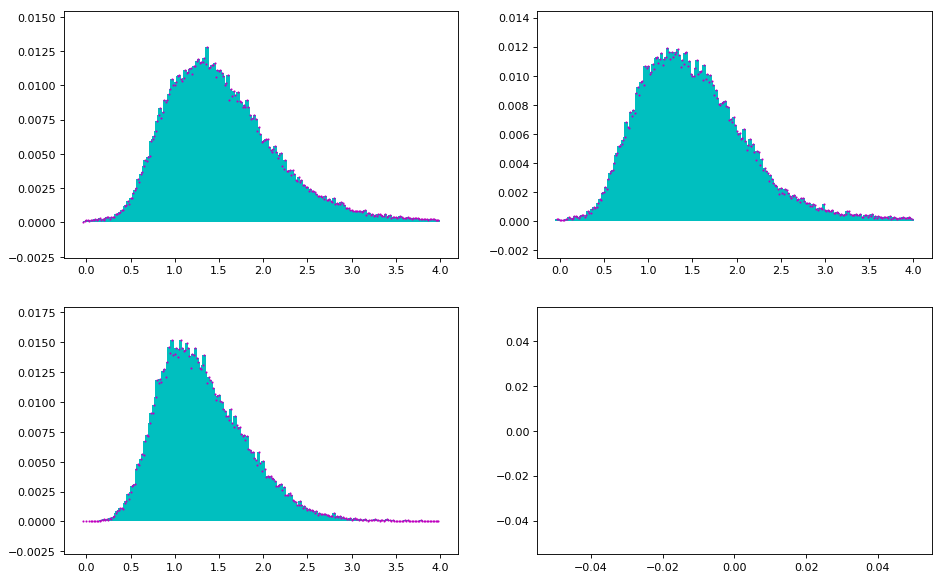

In [84]:
compare_four_hours('A','MD','NM','7',False,4)

In [ ]:
compare_four_hours('A','MD','NM','2',False,1)

In [85]:
abpc.reset_index(inplace=True,drop='True')
def dw_time_hour(h,local,wd):
    filtered = abpc['DWELL TIME'].loc[(abpc['DEPARTURE SOBT HOUR']==h)&(abpc['LOCAL']==local)&(abpc['DEPARTURE SOBT WEEKDAY']==wd)].loc[(abpc['DWELL TIME']>-0.05)&(abpc['DWELL TIME']<4)]
    return filtered

def make_dwell_list(list_of_hours,local,wd):
    dwtime = []
    for hour in list_of_hours:
        dwtime.append(dw_time_hour(hour,local,wd))
    return dwtime

def compare_four_hours_2(hour1,hour2,hour3,hour4,local,wd):

    dwtime_1 = dw_time_hour(hour1,local,wd)
    dwtime_2 = dw_time_hour(hour2,local,wd)
    dwtime_3 = dw_time_hour(hour3,local,wd)
    dwtime_4 = dw_time_hour(hour4,local,wd)

    fig = plt.figure(num=4, figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')
    ax0 = fig.add_subplot(221)
    ax1 = fig.add_subplot(222)
    ax2 = fig.add_subplot(223)
    ax3 = fig.add_subplot(224)
    ax0.hist(dwtime_1,50,range=(0,4),density=True, facecolor='g', alpha=0.75)
    ax1.hist(dwtime_2,50,range=(0,4),density=True, facecolor='r', alpha=0.75)
    ax2.hist(dwtime_3,50,range=(0,4),density=True, facecolor='c', alpha=0.75)
    ax3.hist(dwtime_4,50,range=(0,4),density=True, facecolor='m', alpha=0.75)

def compare_four_hours_2(list_1,list_2,list_3,list_4,local,wd):
    
    dwtime_0 = make_dwell_list(list_1,local,wd)
    dwtime_1 = make_dwell_list(list_2,local,wd)
    dwtime_2 = make_dwell_list(list_3,local,wd)
    dwtime_3 = make_dwell_list(list_4,local,wd)

    fig = plt.figure(num=4, figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')
    ax0 = fig.add_subplot(221)
    ax1 = fig.add_subplot(222)
    ax2 = fig.add_subplot(223)
    ax3 = fig.add_subplot(224)
    
    colors = ['g','r','m','c','y']
    
    i = 0
    for dwt_serie in dwtime_0:
        ax0.hist(dwt_serie,30,range=(0,4),density=True,histtype='stepfilled', alpha=0.4)
        i=i+1
    i = 0
    for dwt_serie in dwtime_1:
        ax1.hist(dwt_serie,30,range=(0,4),facecolor=colors[i],density=True,histtype='stepfilled', alpha=0.4)
        i=i+1
    i = 0
    for dwt_serie in dwtime_2:
        ax2.hist(dwt_serie,30,range=(0,4),facecolor=colors[i],histtype='stepfilled',normed=True, alpha=0.4)
        i=i+1
    i = 0
    for dwt_serie in dwtime_3:
        ax3.hist(dwt_serie,30,range=(0,4),histtype='stepfilled',normed=True, alpha=0.4)
        i=i+1

D:\Programas\Anaconda\envs\predictive.analytics\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
D:\Programas\Anaconda\envs\predictive.analytics\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


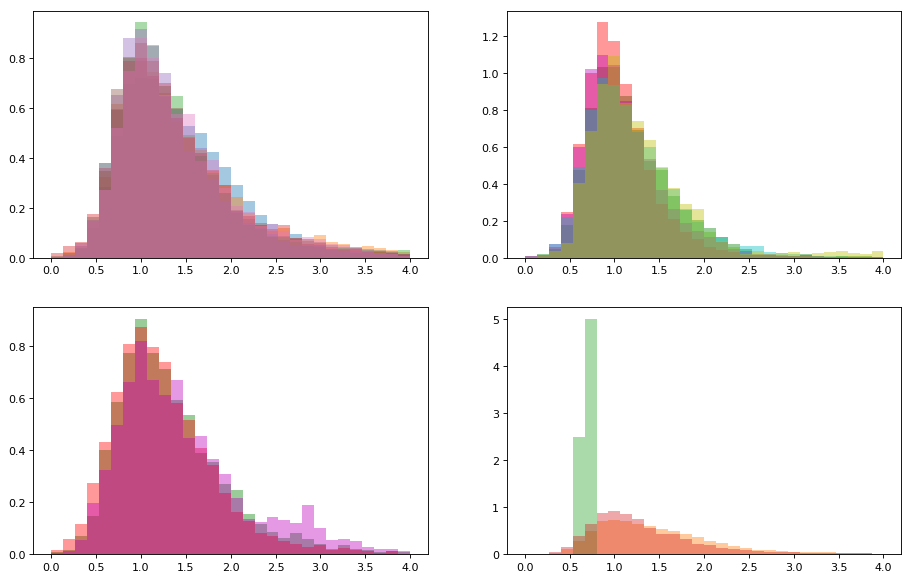

In [86]:
uno = [13,14,15,16,17,18,19] # Good Cluster
tres = [10,11,12] # Good cluster
dos = [4,5,6,7,2] # Good Cluster
cuatro = [1,13,22,17]
local = True
wd = 0

compare_four_hours_2(uno,dos,tres,cuatro,local,wd)

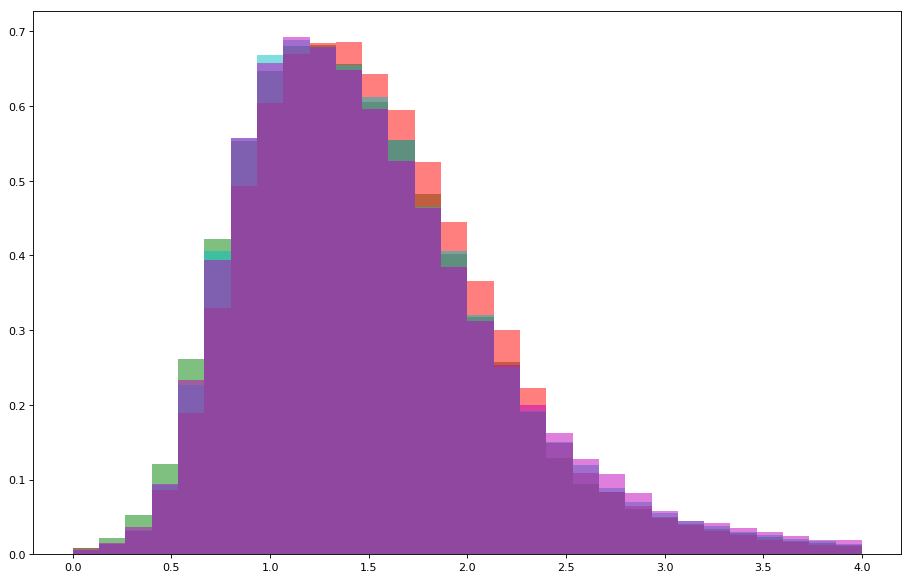

In [99]:
compare_four_hours_2(11,12,13,14)

### Predictions

#### Random Forest

In [60]:
hora = 13
local = True
wd = 0

data_X = abpc['DWELL TIME'].loc[(abpc['DEPARTURE SOBT HOUR']==hora)&(abpc['LOCAL']==local)&(abpc['DEPARTURE SOBT WEEKDAY']==wd)].loc[(abpc['DWELL TIME']>-0.05)&(abpc['DWELL TIME']<4)]

num_train = int(data_X.count()/5*4)
data_X_train_ = data_X[0:num_train] #Train
data_X_test_ = data_X[num_train:] #Test

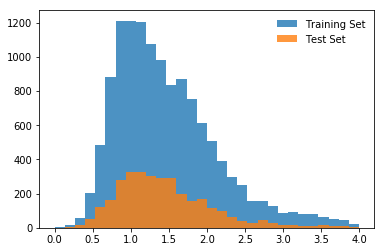

In [95]:
n_train_, bins_train, patchs_train = plt.hist(data_X_train_,30,range=[0,4],alpha=0.8,label="Training Set")
n_test_, bins_test, patchs_test = plt.hist(data_X_test_,30,range=[0,4],alpha=0.8,label="Test Set")
plt.legend(loc="upper right", frameon=False)

In [62]:
tot_train = sum(n_train_)
n_train = list(map(lambda x: x/tot_train,n_train_))
tot_test = sum(n_test_)
n_test = list(map(lambda x: x/tot_test,n_test_))

In [63]:
bins_train_ = []
for i in range(0,len(bins_train)-1):
    bins_train_.append((bins_train[i]+bins_train[i+1])/2)

bins_test_ = []
for i in range(0,len(bins_test)-1):
    bins_test_.append((bins_test[i]+bins_test[i+1])/2)

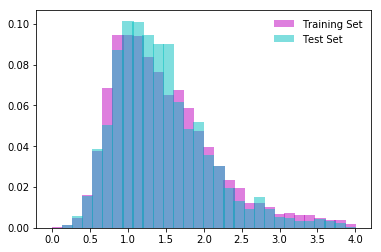

In [93]:
plt.bar(bins_train_,n_train,width=0.15,color='m',alpha=0.5,label="Training Set")
plt.bar(bins_test_,n_test,width=0.15,color='c',alpha=0.5,label="Test Set")
plt.legend(loc="upper right", frameon=False)

In [65]:
bins_train_M = np.array([bins_train_]).transpose()

regressor = RandomForestRegressor(n_estimators=150)
regressor.fit(bins_train_M,n_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

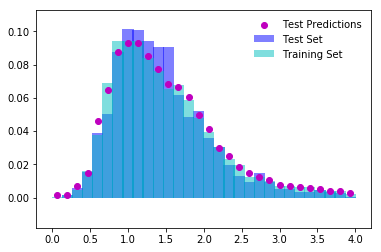

In [92]:
bins_test_M = np.array([bins_test_]).transpose()

plt.scatter(bins_test_M,regressor.predict(bins_test_M),color='m',zorder=5,label="Test Predictions")
plt.bar(bins_test_,n_test,width=0.15,color='b',alpha=0.5,label="Test Set")
plt.bar(bins_train_,n_train,width=0.15,color='c',alpha=0.5,label="Training Set")
plt.legend(loc="upper right", frameon=False)

In [67]:
regressor.score(bins_test_M,n_test)

0.9600600244876931

In [ ]:
###########################################################